# Section:  Approximating functions - Lecture 2

## [2] Polynomial interpolation

Continue our discussion from the last Lecture, we would like to represent a function nicely by a polynomial. 
By "nicely" we mean that the error between the function and the polynomial is small.

Given a function $f(x)$, and a polynomial interpolation $p(x)$, we can define the error, the so-called infinity-norm, as 
$$\|f(x)-p(x)\|_{\infty} = \sup_{x}|f(x)-p(x)|.$$
According to Weierstrass Approximation Theorem, there must exists some polynomial $p(x)$ such that the error is small if $f$ is continous.

But how can we construct this polynomial? A simple answer is that we just choose $n+1$ points on the interval and interpolate a polynomial that passes through these $n+1$ data points, and hopefully, the error will decrease as we choose more and more points.

In the following we try to interpolate some functions using various node and see if some of them is better than others.

### [2.1] Random Nodes
Consider a function $f$ on $[-1, 1]$, we interpolate the function on randomly selected nodes, 
$$x_k, \quad k=0,1,2,\cdots,n,$$ 
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

### Example 1
We now try to interpolate $f(x) = \frac{1}{1+15x^2}$ on $[-1,1]$ at randomly selected nodes.

We'll Show the results for $n=5,10,20$.

We'll use packages LinearAlgebra for solving the polynomial and PyPlot for plotting.
Run "using Pkg; Pkg.add("PyPlot")" if you don't have PyPlot installed.

In [1]:
# using Pkg; Pkg.add("PyPlot")
using LinearAlgebra
using PyPlot

Then define the function to interpolate for later on usage.

In [2]:
# We define the function to interpolate
f(x)=1/(1+15x^2)

f (generic function with 1 method)

We write a function that choose $n+1$ random points on $[-1,1]$ and interpolate $f(x)$ at these points by a polynomial.

In [3]:
# Define a function to return the nodes, y-value of the nodes, and the polynomial(as as function)
function RandomNodes(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 random points on [-1,1] with ascending order and calcluate their mapped value
    x_nodes=2*rand(n+1).-1;
    sort(x_nodes);
    f_nodes=f.(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n+1,n+1);
    for i=1:n+1
        A[:,i] = x_nodes.^(n+1-i)
    end
    c = A\f_nodes;
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n+1
            p += c[i]*x^(n+1-i)
        end
        return p
    end
    
    # retunrs the nodes,y-value of the nodes, and the polynomial(as a function)
    return x_nodes,f_nodes,p_inter
end

RandomNodes (generic function with 1 method)

Also we write a function to plot the function and the polynomial on $[-1,1]$, which can be used later on.

In [4]:
# A function for plotting f, and the interpolated polynomial p
function PlotInterpolation(f::Function, p::Function,nodes::Vector,
        labels=["f(x)","p(x)"]::Array{String,1},l=1000::Int)
    # f: The function to interpolate
    # p: The polynomial interpolation
    # nodes: The interpolation nodes and their y-value as a 1-D array of two 1-D arrays
    # labels: The labels of the function and polynomial as a 1-D array of two strings
    # l: length of linspace
    
    
    # Construct the linspace
    xl=range(-1,stop=1,length=l);
    
    #Plot the functions
    plot(xl, f.(xl),label=labels[1]);
    plot(xl, p.(xl),label=labels[2]);
    plot(nodes[1],nodes[2],"or");
    plt.legend();
    plt.title("n=$(n)");
    println("Max. error=",maximum(abs.(p.(xl)-f.(xl))));
end

PlotInterpolation (generic function with 3 methods)

Now, we plot the results for $n=5,10,20$ using above functions.

Max. error=3.8970798578813763

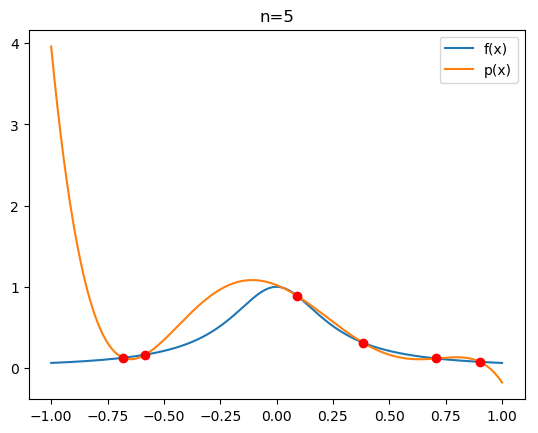

In [5]:
n=5
x_nodes,f_nodes,p_inter=RandomNodes(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

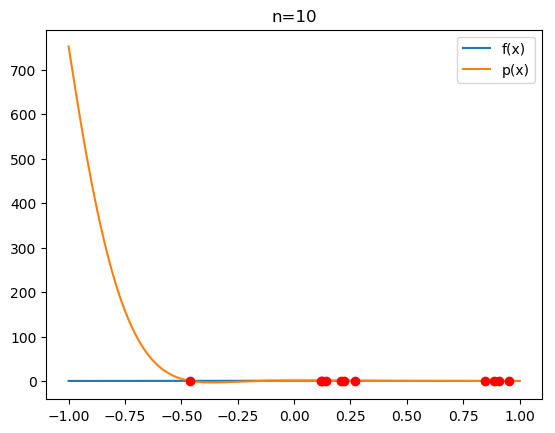

Max. error=752.6287606079871


In [6]:
n=10
x_nodes,f_nodes,p_inter=RandomNodes(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

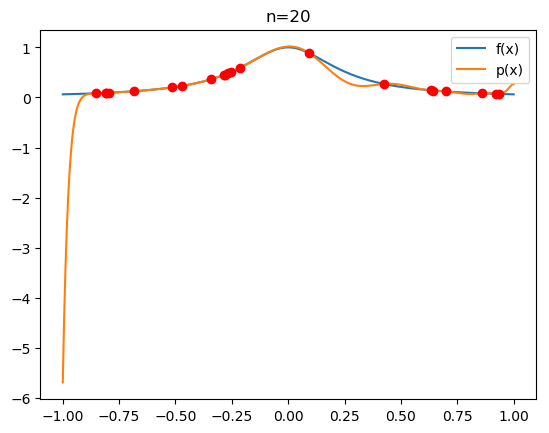

Max. error=5.747623349359602


In [7]:
n=20
x_nodes,f_nodes,p_inter=RandomNodes(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

### [2.2] Equally spaced Nodes
Consider a function $f$ on $[-1, 1]$, we interpolate the function on equally spaced nodes 
$$x_k = -1 + 2\frac{k}{n} \quad k=0,1,2,\cdots,n,$$
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

### Example 2
We now try to interpolate $f(x) = \frac{1}{1+15x^2}$ on $[-1,1]$ at equally spaced nodes.

We'll show the results for $n=5,10,20$.

We write a function that choose $n+1$ equally spaced points on $[-1, 1]$ and interpolate $f(x)$ at these points by a polynomial.

In [8]:
# a function that retunrs the equally spaced nodes, y-value of the nodes, and the polynomial(as a function)
function EquallySpaced(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 equally spaced points on [-1,1] and calcluate their mapped value
    x_nodes=2*(0:n)/n .-1
    f_nodes=f.(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n+1,n+1);
    for i=1:n+1
        A[:,i] = x_nodes.^(n+1-i)
    end
    c = A\f_nodes;
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n+1
            p += c[i]*x^(n+1-i)
        end
        return p
    end
    
    # retunrs the nodes,y-value of the nodes, and the polynomial(as a function)
    return x_nodes,f_nodes,p_inter
end

EquallySpaced (generic function with 1 method)

Now, we plot the results for $n=5,10,20$ using above functions.

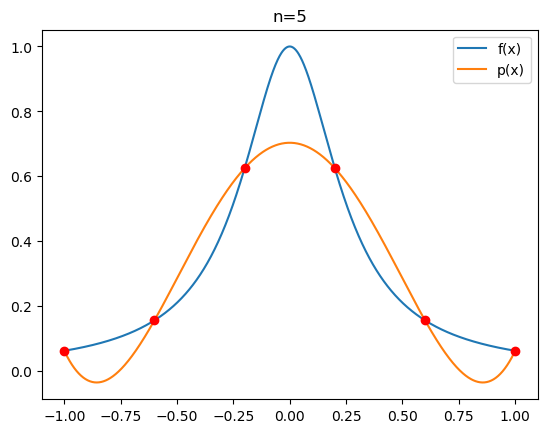

Max. error=0.2966178477489869


In [9]:
n=5
x_nodes,f_nodes,p_inter=EquallySpaced(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

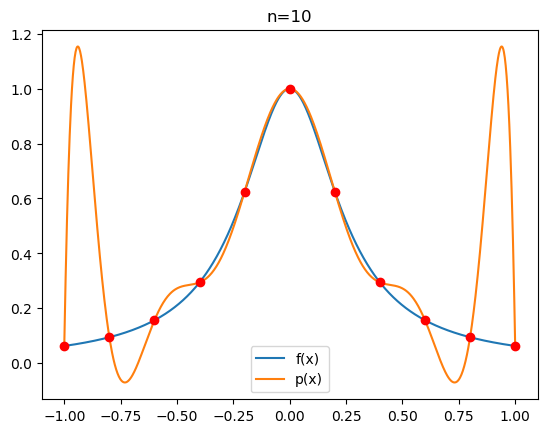

Max. error=1.0837349558797038


In [10]:
n=10
x_nodes,f_nodes,p_inter=EquallySpaced(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

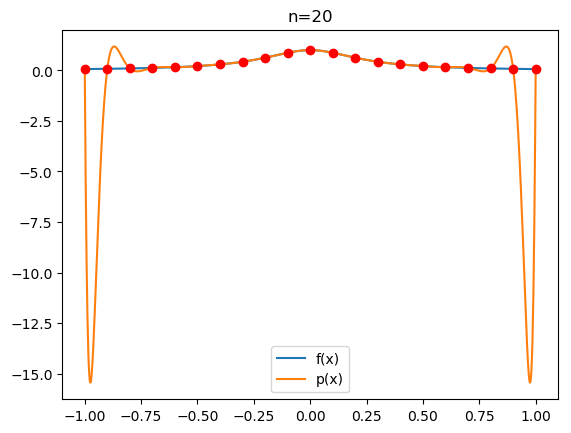

Max. error=15.49965262655401


In [11]:
n=20
x_nodes,f_nodes,p_inter=EquallySpaced(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

#### Remark:
One should note that, equally spaced nodes is not a good choice of interpolating a function as there will be oscilations at the edge of the interval, the so-called **Runge's phenomenon**. See [wiki](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) for fruther details.

### [2.3] Chebyshev Nodes of the first kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the first kind:
$$x_k = \cos\left(\frac{2k-1}{2n}\pi\right) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

### Example 3
We now try to interpolate $f(x) = \frac{1}{1+15x^2}$ on $[-1,1]$ at Chebyshev Nodes of the first kind.

We'll show the results for $n=5,10,20$.

We write a function that choose $n$ Chebyshev nodes of the first kind on $[-1, 1]$ and interpolate $f(x)$ at these points by a polynomial.

In [12]:
function ChebyshevNodes1(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Construct n Chebyshev Nodes of the first kind on [-1,1] and calcluate their mapped value
    x_nodes = cos.(((1:n).-0.5)*pi/(n));
    f_nodes = f.(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n,n);
    for i=1:n
        A[:,i] = x_nodes.^(n-i)
    end
    c = A\f_nodes;
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n
            p += c[i]*x^(n-i)
        end
        return p
    end
    
    # retunrs the nodes,y-value of the nodes, and the polynomial(as a function)
    return x_nodes,f_nodes,p_inter
end

ChebyshevNodes1 (generic function with 1 method)

Now, we plot the results for $n=5,10,20$ using above functions.

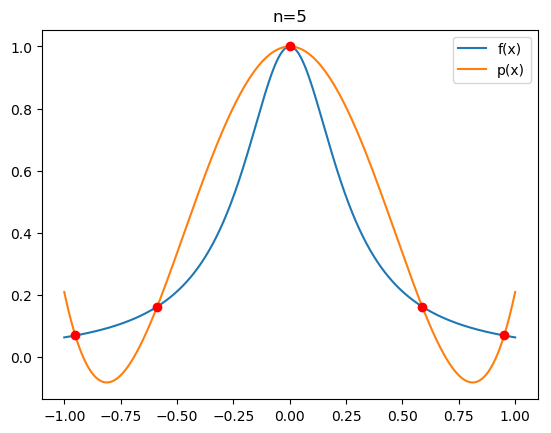

Max. error=0.298909068865834


In [13]:
n=5
x_nodes,f_nodes,p_inter=ChebyshevNodes1(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

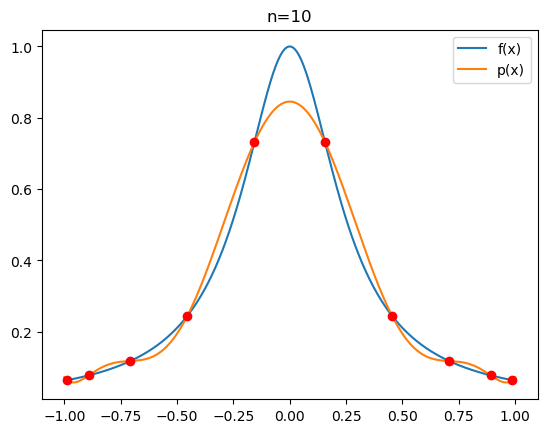

Max. error=0.15457521395748808


In [14]:
n=10
x_nodes,f_nodes,p_inter=ChebyshevNodes1(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

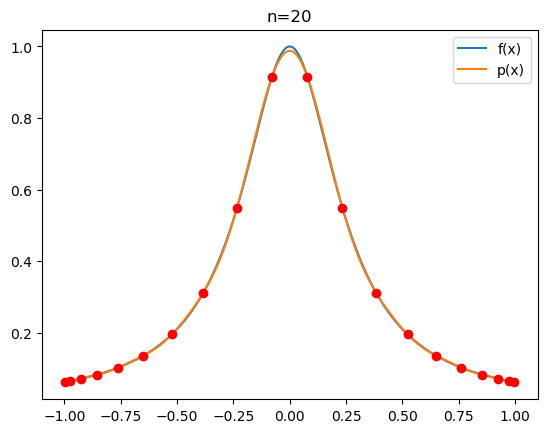

Max. error=0.012090188029383775


In [15]:
n=20
x_nodes,f_nodes,p_inter=ChebyshevNodes1(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

### [2.4] Chebyshev Nodes of the second kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the second kind:
$$x_k = \cos\left(\frac{k}{n}\pi\right) \quad k=0,1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n$-th degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

#### Remark: 
The most important difference between the Chebyshev nodes of the first and the second kind is that the second one includes boundary points, while the first one does not.

### Example 4
We now try to interpolate $f(x) = \frac{1}{1+15x^2}$ on $[-1,1]$ at Chebyshev Nodes of the second kind.

We'll show the results for $n=5,10,20$.

We write a function that choose $n+1$ Chebyshev nodes of the second kind on $[-1, 1]$ and interpolate $f(x)$ at these points by a polynomial.

In [16]:
function ChebyshevNodes2(f::Function , n::Int)
    # f: The function to interpolate
    # n: The number of nodes
    
    # Generate n+1 Chebyshev Nodes of the second kind on [-1,1] and calcluate their mapped value
    x_nodes = cos.(((0:n)*pi/n));
    f_nodes = f.(x_nodes);
    
    # Calculate coeffiencts of the polynomial
    A=zeros(n+1,n+1);
    for i=1:n+1
        A[:,i] = x_nodes.^(n+1-i)
    end
    c = A\f_nodes;
    
    # Construct the polynomial
    function p_inter(x)
        p=0;
        for i=1:n+1
            p += c[i]*x^(n+1-i)
        end
        return p
    end
    
    # retunrs the nodes,y-value of the nodes, and the polynomial(as a function)
    return x_nodes,f_nodes,p_inter
end

ChebyshevNodes2 (generic function with 1 method)

Now, we plot the results for $n=5,10,20$ using above functions.

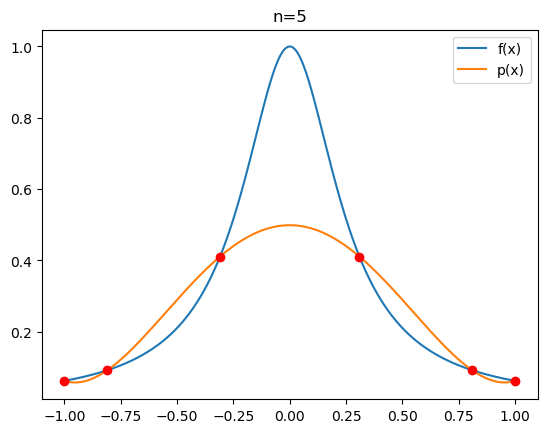

Max. error=0.5010251354266867


In [17]:
n=5
x_nodes,f_nodes,p_inter=ChebyshevNodes2(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

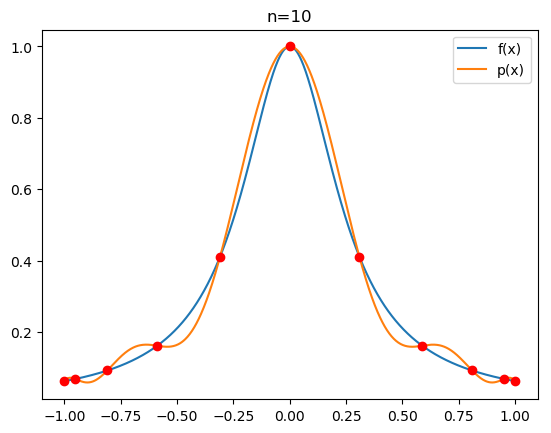

Max. error=0.06804959725044601


In [18]:
n=10
x_nodes,f_nodes,p_inter=ChebyshevNodes2(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

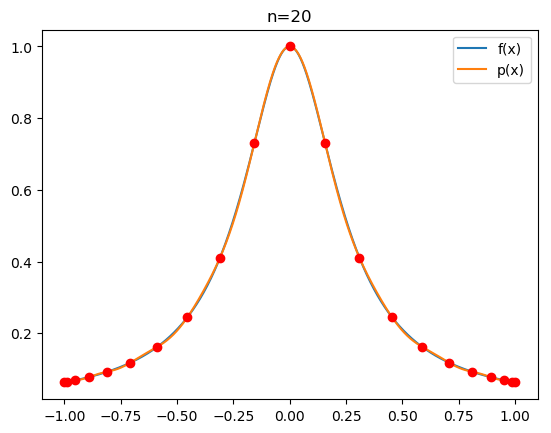

Max. error=0.005663989698434513


In [19]:
n=20
x_nodes,f_nodes,p_inter=ChebyshevNodes2(f,n);
PlotInterpolation(f,p_inter,[x_nodes,f_nodes])

## Conclusion

So far we have show examples of using several different nodes to interpolate a function. Some of them are good and some of them are bad. However, is there a good way to design or to determine what kind of nodes is good or bad? That will be the topic of the next lecture.